In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [15]:
import pathlib
data_dir = os.path.join("D:\pythonProject\Patterns")
print(type(data_dir))

<class 'str'>


In [16]:
batch_size = 2
img_height = 180
img_width = 180

In [17]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15 files belonging to 3 classes.
Using 12 files for training.


In [18]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15 files belonging to 3 classes.
Using 3 files for validation.


In [19]:
class_names = train_ds.class_names
print(class_names)

['Downward Channel', 'Horizontal Channel', 'Upward Channel']


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [28]:
num_classes = 3 #number of sub_folders inside main_folder

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [29]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [33]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
6/6 [==============================] - 0s 74ms/step - loss: 0.9613 - accuracy: 0.4167 - val_loss: 1.1134 - val_accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 72ms/step - loss: 0.7774 - accuracy: 0.6667 - val_loss: 1.3376 - val_accuracy: 0.3333
Epoch 3/50
6/6 [==============================] - 0s 74ms/step - loss: 0.5846 - accuracy: 0.8333 - val_loss: 0.7069 - val_accuracy: 1.0000
Epoch 4/50
6/6 [==============================] - 0s 74ms/step - loss: 0.2865 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 1.0000
Epoch 5/50
6/6 [==============================] - 0s 85ms/step - loss: 0.0903 - accuracy: 1.0000 - val_loss: 0.2841 - val_accuracy: 1.0000
Epoch 6/50
6/6 [==============================] - 1s 82ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 7/50
6/6 [==============================] - 0s 75ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0256 - val_accuracy: 1.0000
Epoch 8/50
6/6 [=======

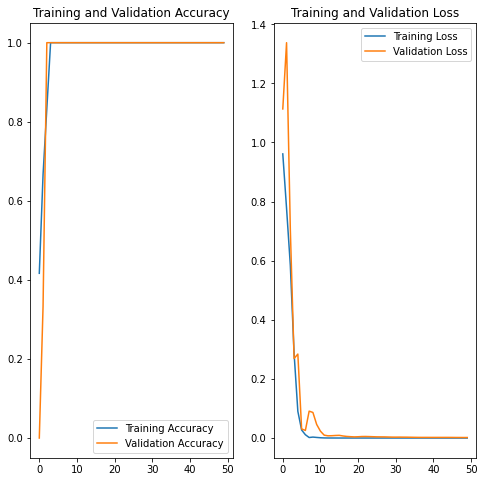

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:

img_path = os.path.join("D:/pythonProject/Predict_img/dontknow1.jpg")

img = keras.preprocessing.image.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Horizontal Channel with a 89.55 percent confidence.
